## 15.2- Caso de Estudio - Clasificación

### 15.2.1.- Cargar el dataset

Carga load_digits desde sklearn.datasets y luego metelo en un objeto

In [46]:
from sklearn.datasets import load_digits

Imprime la descripcion del dataset

In [47]:
digits = load_digits()

Checa el target de tu nuevo objeto digitos

In [48]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Ahora prueba revisando la forma del arreglo digitos

In [49]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Y la forma del arreglo target

In [50]:
digits.data.shape

(1797, 64)

Vamos revisando la imagen 15 del arreglo... no es lo que esperas

In [51]:
digits.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

y ahora veamos el .data para ver el arreglo en 1x64

In [52]:
digits.data[15]

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

### 15.2.2.- Visualizar los datos

Veamos los datos utilizando matplotlib, comienza importando esta libreria

In [53]:
import matplotlib.pyplot as plt

Ahor adibuja una cuadricula para lograr tu cometido

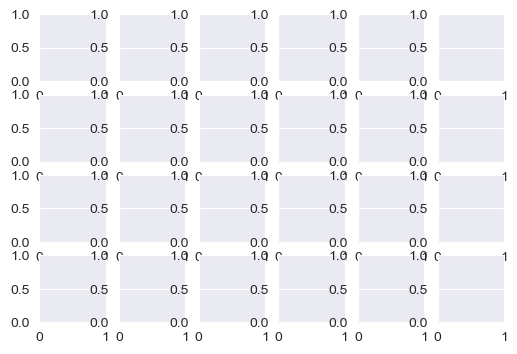

In [54]:
figure,axes = plt.subplots(nrows=4,ncols=6,figsize=(6,4))

a continuación, vamos a usar un for paraiterar en paralelo a traves de los 24 cuadritos y traer las priemras 24 imagenes

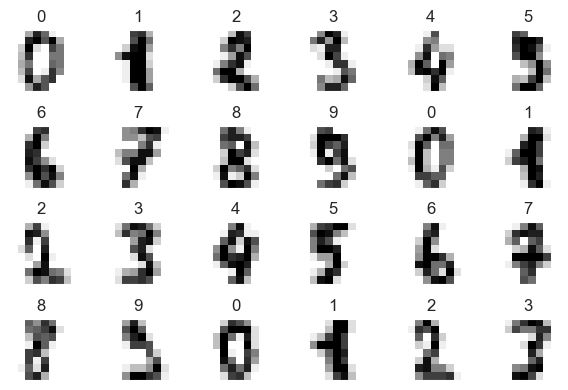

In [55]:
figure,axes = plt.subplots(nrows=4,ncols=6,figsize=(6,4))
for item in zip(axes.ravel(),digits.images,digits.target):
    axes,image,target = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

### 15.2.3.- Separar el dataset para entrenamientos y pruebas

ok, ahora vamos a importar train_test_split desde sklearn.model_selection

In [56]:
from sklearn.model_selection import train_test_split

Y a continuación generar el split entre test y train

In [57]:
x_train,X_test,y_train,Y_test = train_test_split(digits.data,digits.target,random_state=11)

Veamos las shapes de nuestros sets para X (muestras)

In [58]:
x_train.shape
X_test.shape

(450, 64)

### 15.2.4.- Crear el modelo

Ahora importamos el KNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

y armamos un objeto llamado KNN de este Clasificador

In [60]:
knn = KNeighborsClassifier()

### 15.2.5.- Entrenar el modelo

Ahora arma el método fit para cargar los datos en el estimador

In [61]:
knn.fit(X=x_train,y=y_train)

KNeighborsClassifier()

### 15.2.6.- Predecir clases de dígitos

Arma un objeto llamdo prediccion

In [62]:
prediction = knn.predict(X=X_test)

Arma un objeto llamado esperado

In [63]:
esperdo = Y_test

Comparemos predicho vs esperado

In [64]:
prediction[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [65]:
esperdo[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

armamos una comprension de lista para localizar todas las predicciones incorrectas

In [66]:
mistakes = [(p,e) for (p,e) in zip(prediction,esperdo) if p!=e]

In [67]:
mistakes

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## 15.3 Clasificación parte 2 - Dataset de digitos

### 15.3.1.- Metricas para la exactitud del modelo

Usa knn.score para conocer que tan bien se desempeño tu estimador

In [68]:
print(f'{knn.score(X_test,Y_test):.2%}')

97.78%


Ahora vamos a ahacer una matriz de confusion para ver los hits y misses para una clase dada, llama la funcion matriz de confusión desde sklearn metricsModule

In [69]:
from sklearn.metrics import confusion_matrix

Y ahora armar tu matriz de confusion

In [70]:
confusion = confusion_matrix(y_true=esperdo,y_pred=prediction)

Checa los resultados

In [71]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

Ahora sigue un reporte de calsificación, importa classification_report desde sklearn.metrics

In [72]:
from sklearn.metrics import classification_report

Y ahora crea una comprension de lista que nos de los nombres de los digitos

In [73]:
names = [str(digit) for digit in digits.target_names]

Y termina haciendo tu reporte de clasificacion

In [74]:
names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Y ahora ahremos un heatmap con la matriz de confusion

In [75]:
print(classification_report(esperdo,prediction,target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [76]:
import pandas as pd
import seaborn as sns

In [77]:
confusion_df = pd.DataFrame(confusion,index=range(10),columns=range(10))

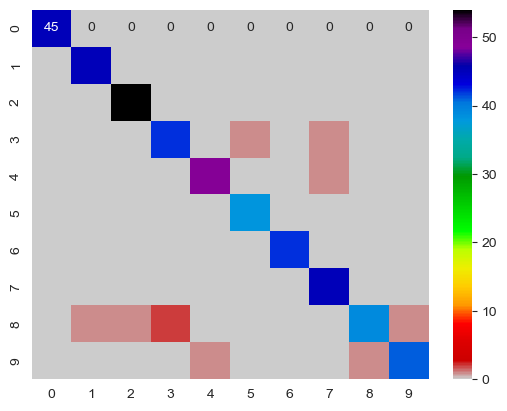

In [78]:
axes = sns.heatmap(confusion_df,annot=True,cmap='nipy_spectral_r')

### 15.3.2.- K-Fold Validación Cruzada

Importa kfold desde sklearn.modelselection

In [79]:
from sklearn.model_selection import KFold

Crea tu primer objeto kfold

In [80]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

Ahora importa cross_val_score

In [81]:
from sklearn.model_selection import cross_val_score

Y crea un objeto llamado puntuacion para probar tu modelo

In [82]:
score = cross_val_score(estimator=knn,X=digits.data,y=digits.target,cv=kfold) #cv is the objet witch train and test for example kfold 

Checa los resultados

In [83]:
score.mean()

0.9872067039106145

### 15.3.3.- Varios Modelos hasta dar con el bueno

Importa SVC y GaussianNB

In [84]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Crea los estimadores en un diccionario

In [90]:
estimadores = {"KNeigbour": knn,"SVC":SVC(gamma="scale"),"GaussianNB":GaussianNB()}
type(estimadores)


dict

Ejecuta los modelos con un for

In [94]:
for nameEstimador, obj_estimador in estimadores.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    score_two = cross_val_score (estimator= obj_estimador,X=digits.data,y=digits.target,cv=kfold)
    print(f'{nameEstimador:>20} ' + f'Score mean = {score_two.mean():.2%}; ' + f'Desviacion estandar = {score_two.std():.2%}')

           KNeigbour Score mean = 98.72%; Desviacion estandar = 0.75%
                 SVC Score mean = 98.72%; Desviacion estandar = 0.79%
          GaussianNB Score mean = 84.48%; Desviacion estandar = 3.47%


### 15.3.3.- Ajustar Hiperparametros

Ajusta el hiperparametro para ver si alguno nos da mejor exactitud

In [99]:
for k in range(1,21,1):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(estimator=knn,X=digits.data,y=digits.target,cv=kfold)
    print(f'k={k:<20}' + f'Score mean = {score_two.mean():.2%}; ' + f'Desviacion estandar = {score_two.std():.2%}')


k=1                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=2                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=3                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=4                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=5                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=6                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=7                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=8                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=9                   Score mean = 84.48%; Desviacion estandar = 3.47%
k=10                  Score mean = 84.48%; Desviacion estandar = 3.47%
k=11                  Score mean = 84.48%; Desviacion estandar = 3.47%
k=12                  Score mean = 84.48%; Desviacion estandar = 3.47%
k=13                  Score mean = 84.48%; Desviacion estandar = 3.47%
k=14                  Score mean = 84.48%; Desviacion estandar = 3.47%
k=15  

## 15.4 Series de tiempo y simple regresión lineal

Importa pandas si no lo has hecho, carga los datos de casas

In [100]:
import pandas as pd

In [101]:
kchouse = pd.read_csv("kc_house_data.csv")

Dale nombre a las columnas del dataframe

In [102]:
kchouse.columns = ["Area_ft","Price_USD"]

Muestra los primeros 20 datos

In [103]:
kchouse.head(
)

,Area_ft,Price_USD
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


usemos train test split para training y pruebas

In [104]:
#un df es una serie, tenemos que comvertir el df en un arreglo bidimencional para poder usar linear rergression
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(kchouse.Area_ft.values.reshape(-1,1),kchouse.Price_USD.values,random_state=11)

Chequemos los tamaños de train y test

In [111]:
X_train.shape

(16209, 1)

In [113]:
X_test.shape

(5404, 1)

importa LinearRegression de sklearn

In [114]:
from sklearn.linear_model import LinearRegression

Arma el estimador y haz el fit

In [116]:
reg_linear = LinearRegression()

In [117]:
reg_linear.fit(X = X_train, y = y_train)

LinearRegression()

Obten el Coef y el INtercept

In [118]:
reg_linear.coef_

array([283.3312025])

In [119]:
reg_linear.intercept_

-47648.888722138945

Probemos el modelo, crea los objetos prediccion y esperado

In [125]:
prediction = reg_linear.predict(X_test)

In [129]:
esperado = y_test

Arma un ciclo que muestre p vs e para los datos de 5 en 5

In [131]:
for p,e in zip(prediction[::300],esperado[::300]):
    print(f'prediccion: {p:.2f}, Esperado {e:.2f}')
    

prediccion: 264015.43, Esperado 343566.00
prediccion: 782511.53, Esperado 650880.00
prediccion: 295748.53, Esperado 340000.00
prediccion: 439680.78, Esperado 770000.00
prediccion: 884510.77, Esperado 775000.00
prediccion: 278181.99, Esperado 420000.00
prediccion: 298015.18, Esperado 940000.00
prediccion: 521846.83, Esperado 627800.00
prediccion: 538846.70, Esperado 880000.00
prediccion: 932677.07, Esperado 730000.00
prediccion: 419847.60, Esperado 610000.00
prediccion: 198849.26, Esperado 395000.00
prediccion: 638012.62, Esperado 675000.00
prediccion: 479347.15, Esperado 301350.00
prediccion: 561513.20, Esperado 950000.00
prediccion: 632346.00, Esperado 569000.00
prediccion: 368847.98, Esperado 432000.00
prediccion: 385847.85, Esperado 412500.00
prediccion: 997843.25, Esperado 1130000.00


Vamos a predecir precios de casas usando area en sqft

In [132]:
predice = (lambda x: reg_linear.coef_*x+reg_linear.intercept_)

In [134]:
predice(1160)

array([281015.30617429])

Y ahora visaulizemos la regresion lineal con seaborn

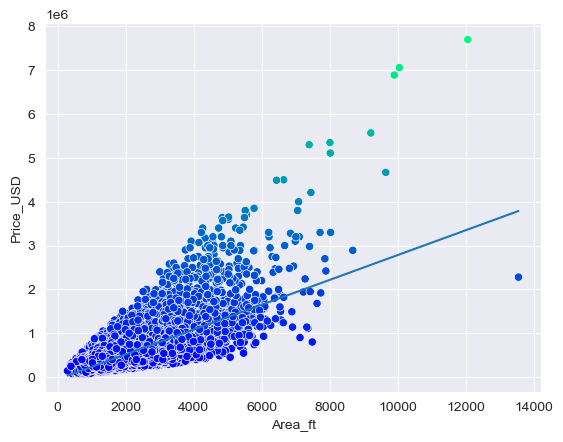

In [142]:
import seaborn as sns
axes = sns.scatterplot(data=kchouse, x = "Area_ft", y = "Price_USD",hue="Price_USD", palette="winter", legend=False)
import numpy as np
x = np.array([min(kchouse.Area_ft.values), max(kchouse.Area_ft.values)])
y = predice(x)

import matplotlib.pyplot as plt
line = plt.plot(x,y)

## 15.5 Regresion lineal multiple con los datos de California

### 15.5.1 Cargar el dataset

In [7]:
from sklearn.datasets import fetch_california_housing

In [8]:
california_housing = fetch_california_housing()

In [145]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [146]:
california_housing.data.shape

(20640, 8)

In [147]:
california_housing.target.shape

(20640,)

In [ ]:
california_housing.feature_names

### 15.5.2 Explorar los datos

Importa Pandas si no lo has hecho, altera las precisiones a 4, max columns a 9 y display width a none

In [1]:
import pandas as pd

In [4]:
pd.set_option("max_columns",9)

OptionError: Pattern matched multiple keys

Carga los datos de california en un dataframe

In [9]:
df_california = pd.DataFrame(california_housing.data,columns=california_housing.feature_names)

Agrega el target de california al mismo dataframe como una columna (Serie) adicional

In [10]:
df_california["Price_house"] = pd.Series(california_housing.target)

Checa el head de california

In [11]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price_house
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Hagamos un describe para ver que onda

In [12]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price_house
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 15.5.3 Visualizar los datos

Vamos a armar un muestreo del 10% del dataset para ver mas facil las visualizaciones

In [13]:
muestra_df = df_california.sample(frac=0.1,random_state=7)

Importa Matplotlib

In [14]:
import matplotlib.pyplot as plt

IMporta Seaborn

In [15]:
import seaborn as sns

Cambia la fuente de seaborn

In [16]:
sns.set(font_scale=1.5)

Ponlo tipo Whitegrid

In [17]:
sns.set_style("whitegrid")

Arma graficas de precio vs cada feature

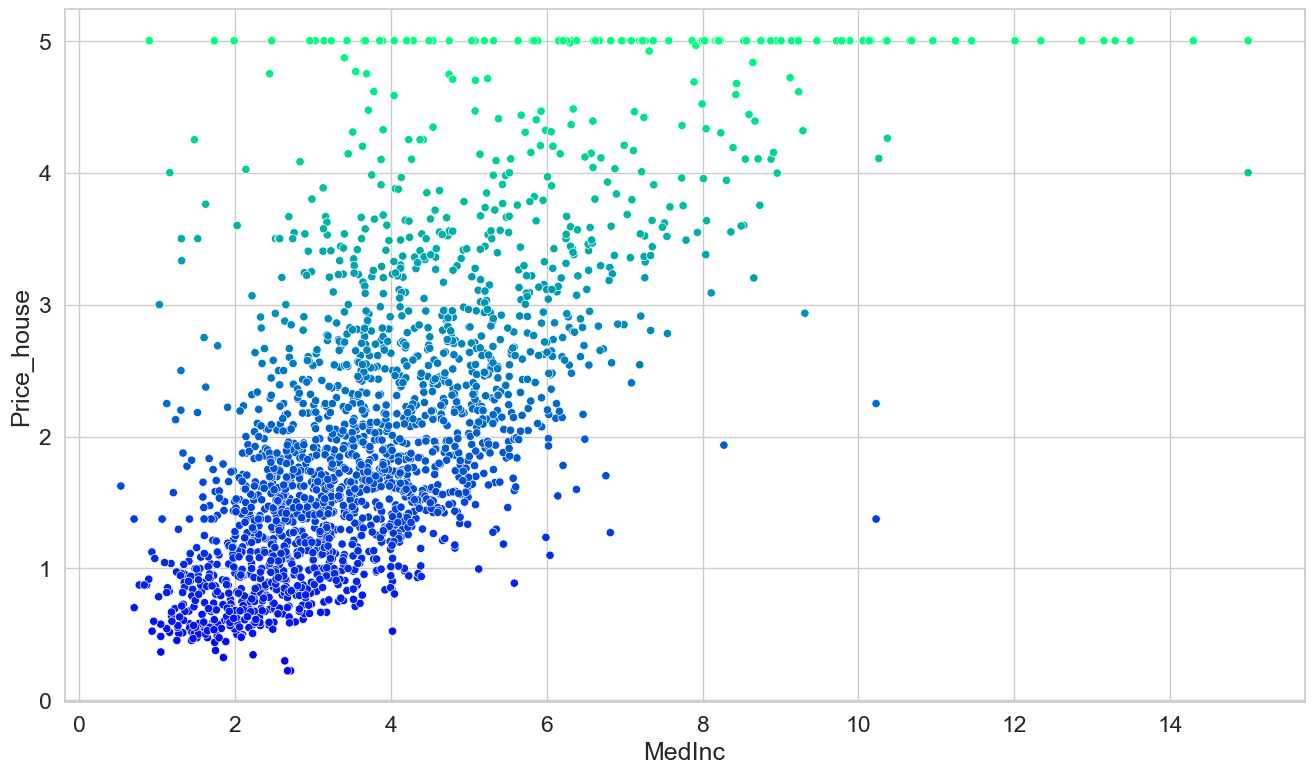

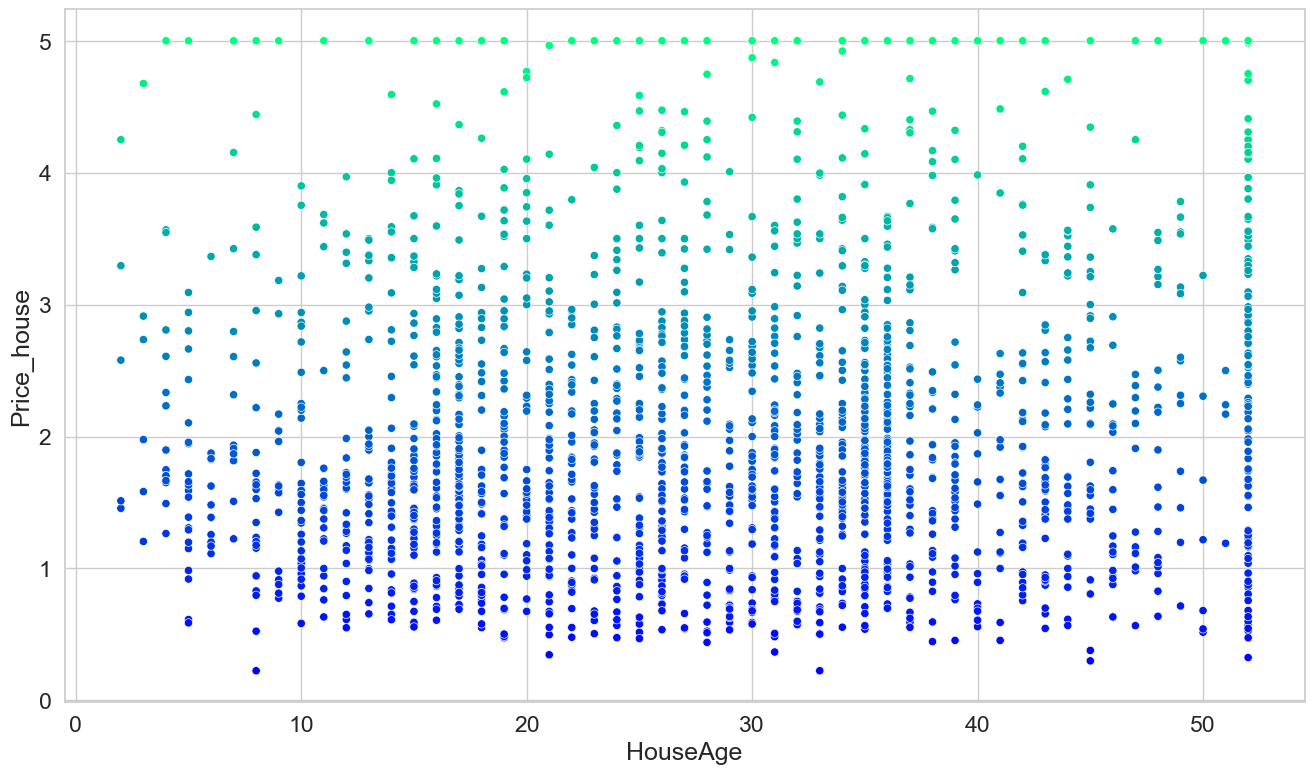

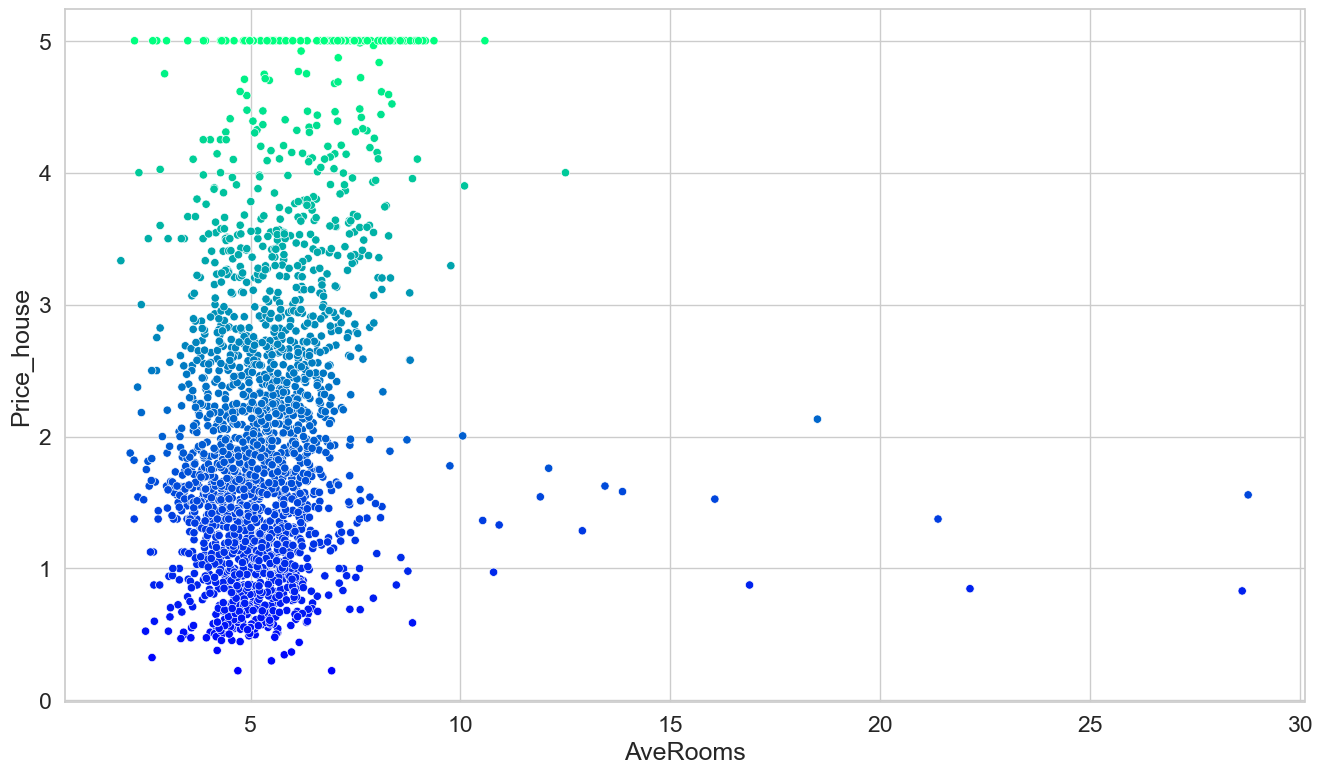

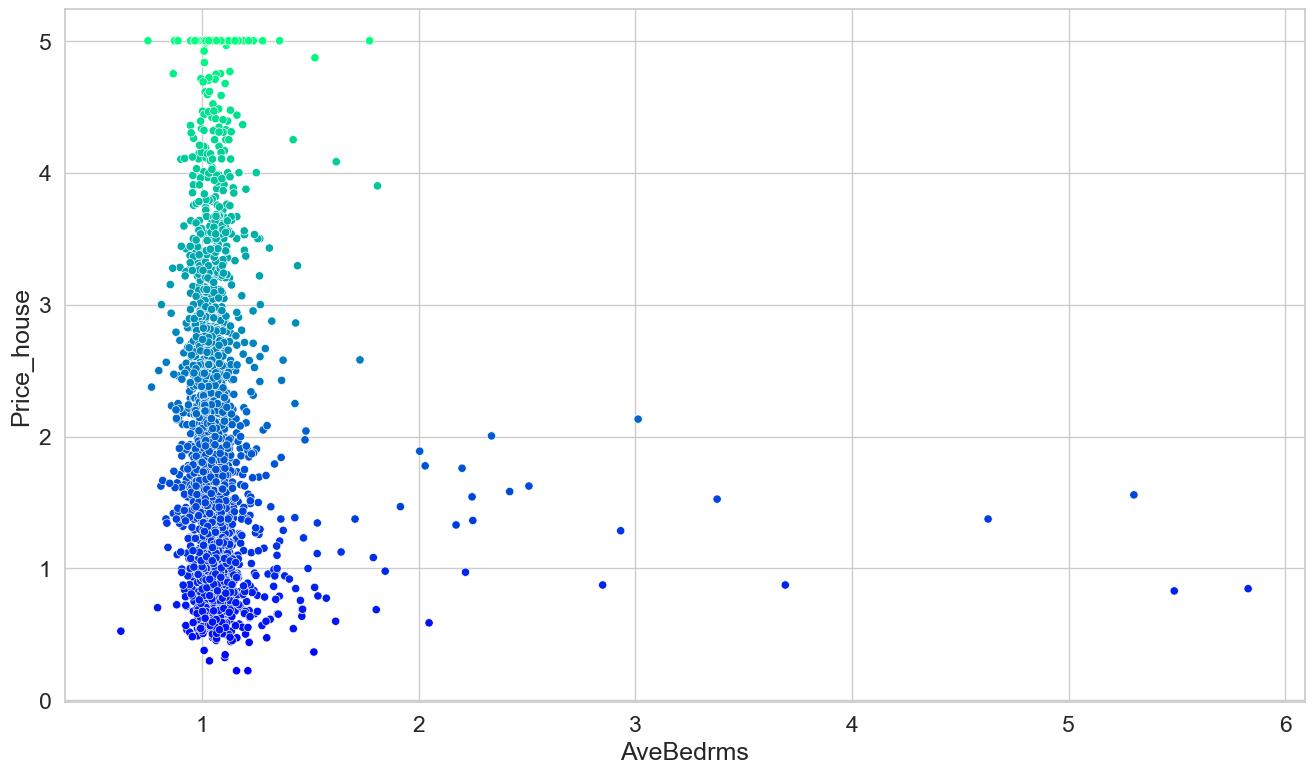

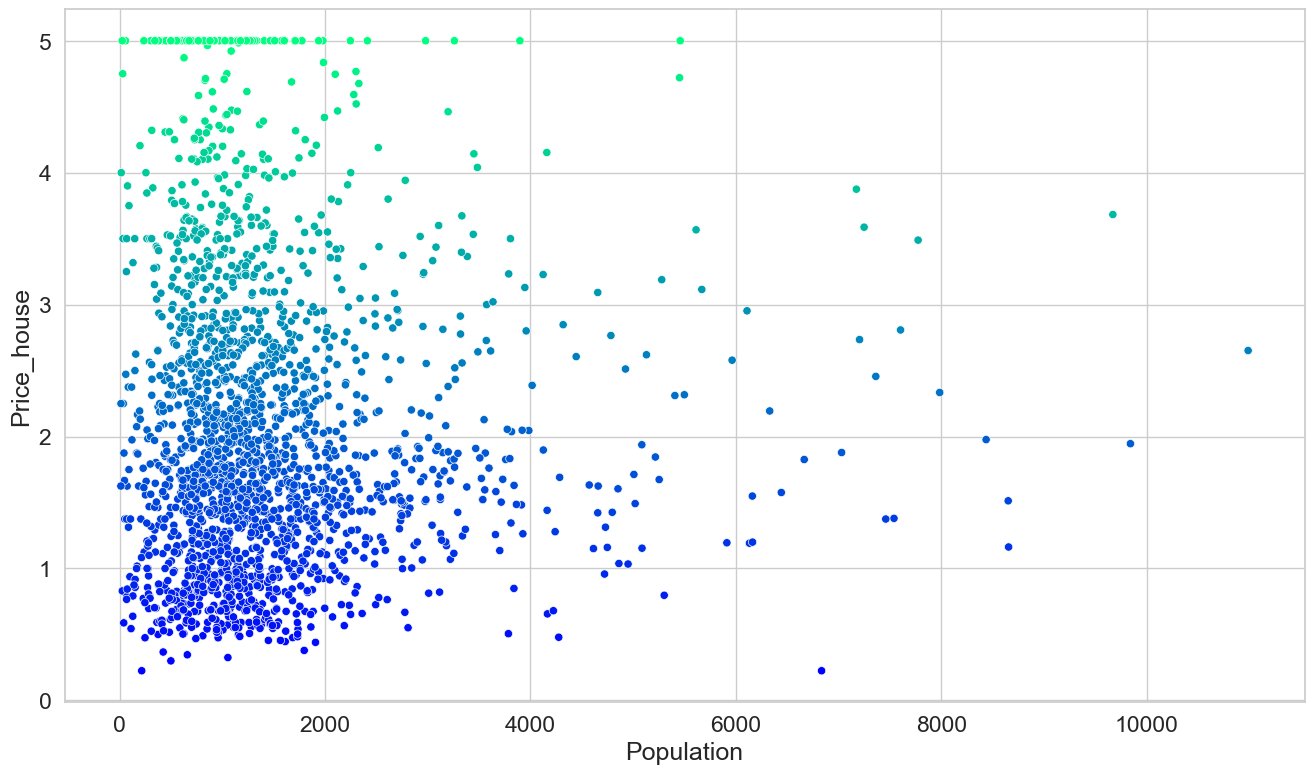

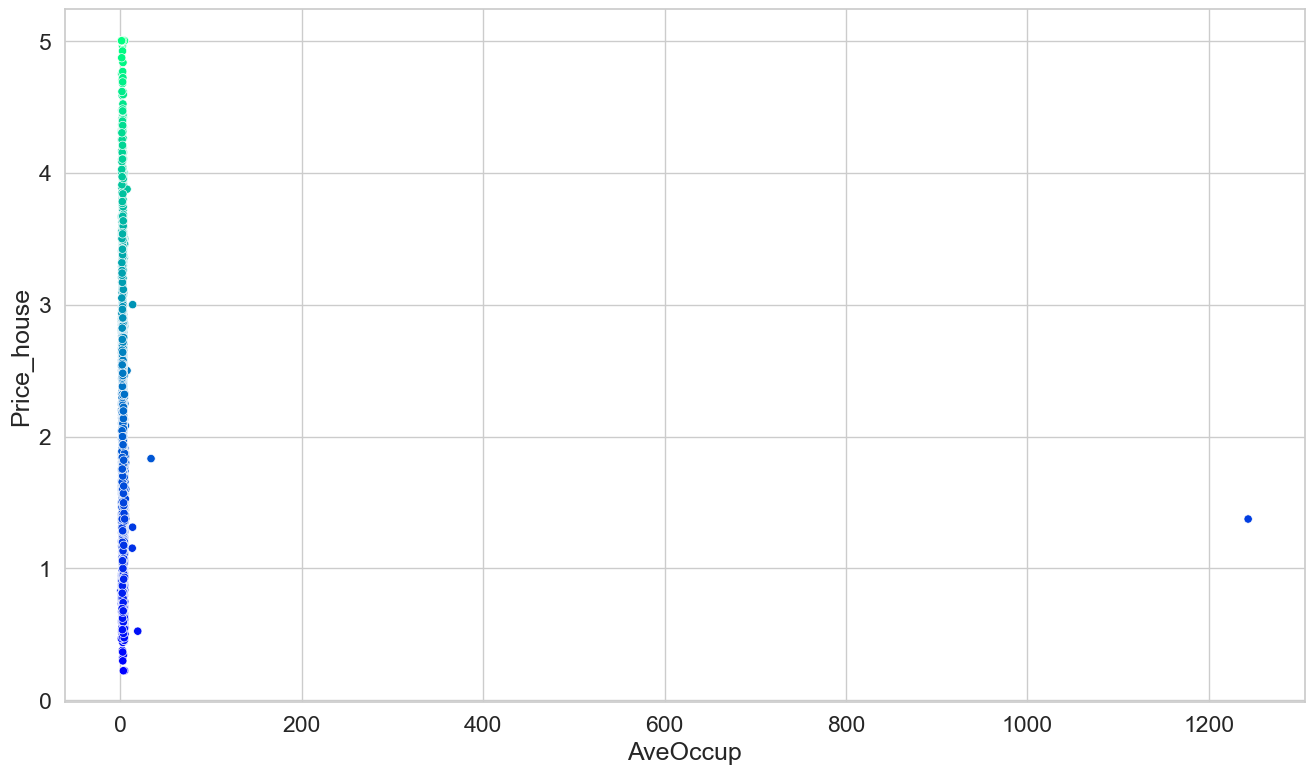

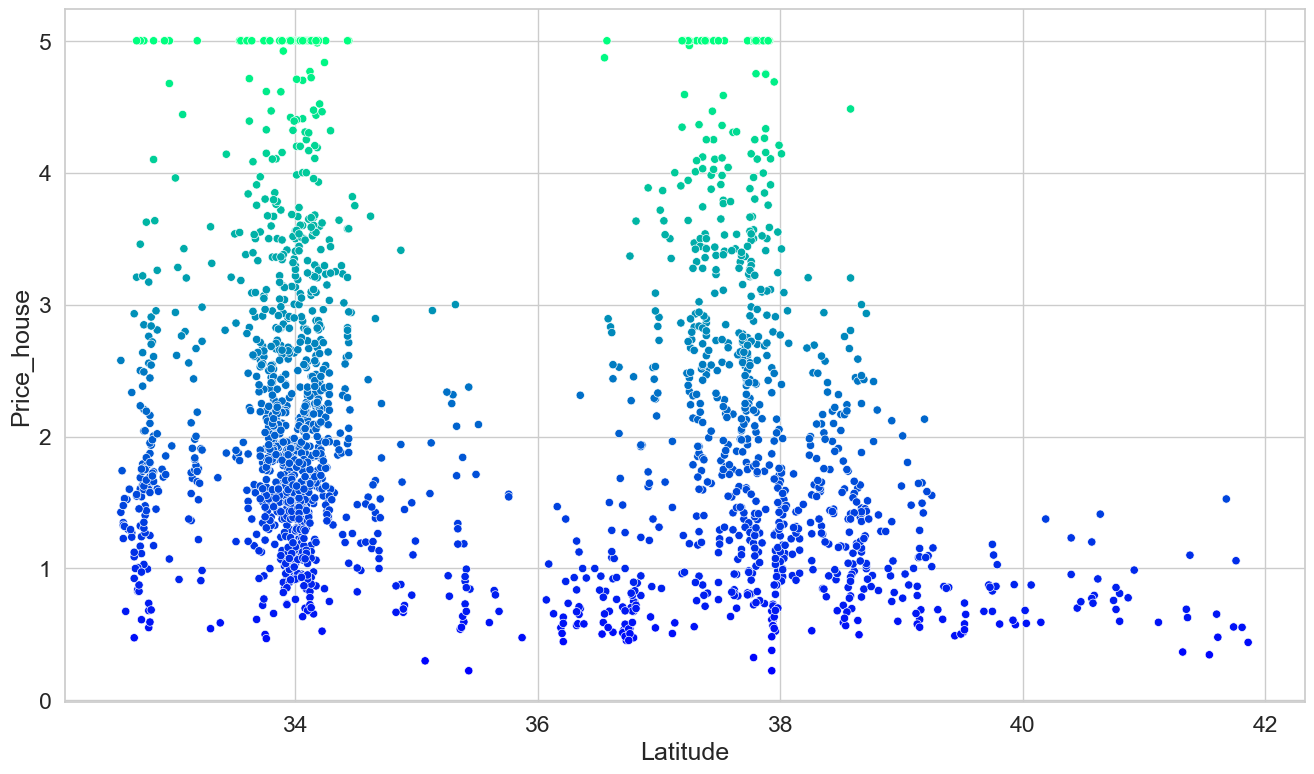

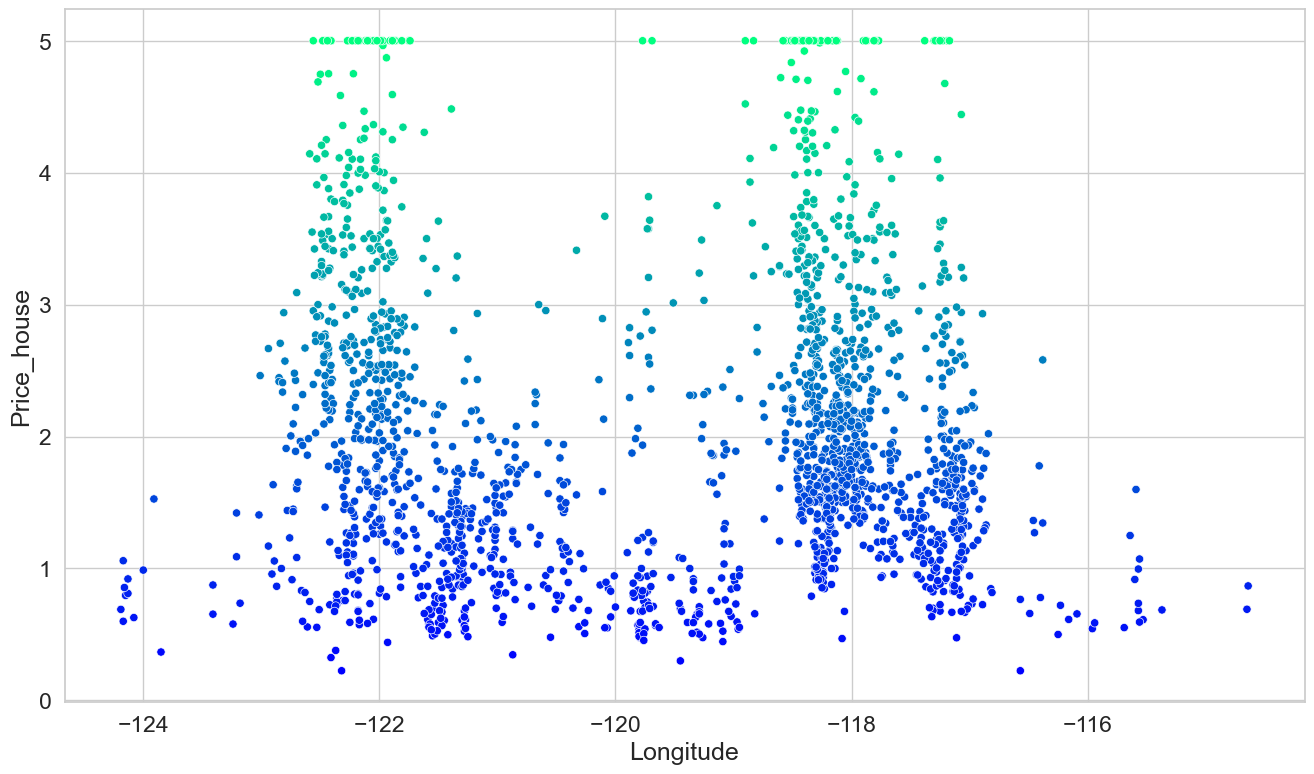

In [19]:
for feature in california_housing.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=muestra_df,x=feature,y="Price_house",hue="Price_house",palette="winter",legend=False)

### 15.5.4 Separar los datos para training y pruebas

Importa de sklearn.model_selection el train_test_split

In [20]:
from sklearn.model_selection import train_test_split

Arma tu train test split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(california_housing.data,california_housing.target,random_state=11)

Checa las figura de train

In [22]:
X_train.shape

(15480, 8)

Checa la figura de test

In [23]:
X_test.shape

(5160, 8)

### 15.5.5 Entrenar el modelo

Importa LinearRegression desde sklearn.linear_model

In [24]:
from sklearn.linear_model import LinearRegression

arma tu objeto reglin

In [25]:
reg_linear = LinearRegression()

Haz el fit

In [26]:
reg_linear.fit(X=X_train,y = y_train)

LinearRegression()

Arma tu for para enumerar todos los coeficientes

In [27]:
for i , name in enumerate(california_housing.feature_names):
    print(f'{name:>10} - {reg_linear.coef_[i]}')

    MedInc - 0.4377030215382207
  HouseAge - 0.009216834565797805
  AveRooms - -0.10732526637360953
 AveBedrms - 0.6117133073918067
Population - -5.75682200931564e-06
  AveOccup - -0.003384566465716353
  Latitude - -0.41948186096490636
 Longitude - -0.4337713349874019


Obten el intercept

In [28]:
reg_linear.intercept_

-36.88295065605551

### 15.5.6  Probar el modelo

Arma tu prediccion

In [30]:
prediction = reg_linear.predict(X_test)

Arma tu lista de valores esperados

In [33]:
esperado = y_test

vamos a ver las primeras 5 predicciones

In [35]:
prediction[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

vs los primeros 5 valores esperados

In [36]:
esperado[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### 15.5.7  Visualizar los precios esperados vs predecidos

Arma un Dataframe vacio

In [37]:
df = pd.DataFrame()

Agregale una columna con los precios esperados

In [38]:
df["Esperado"] = pd.Series(esperado)

Otra con los precios predichos

In [39]:
df["Prediccion"] = pd.Series(prediction)

Arma una figura de plt

Metele un scatterplot de seaborn

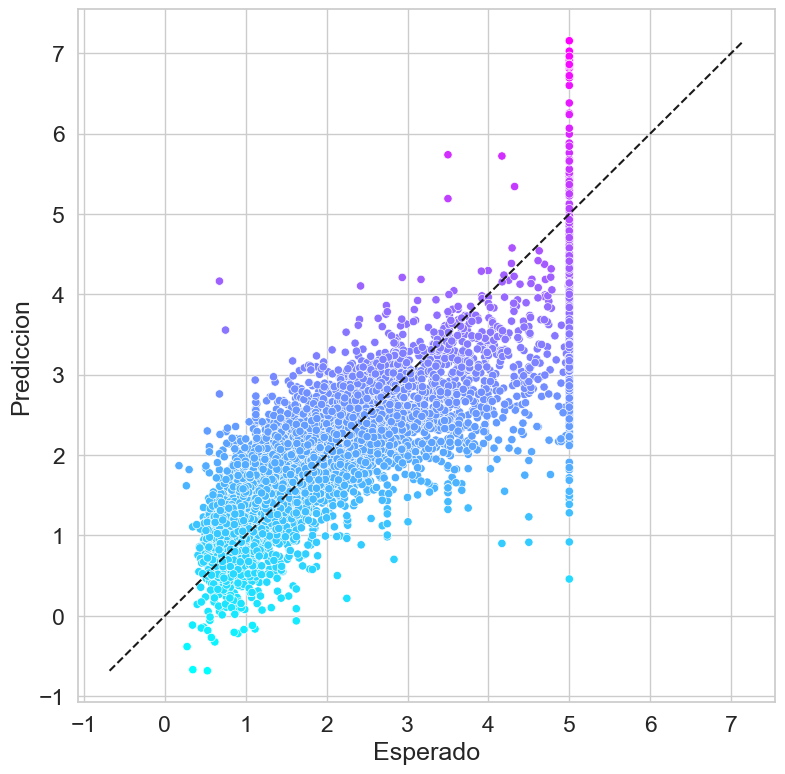

In [46]:
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df,x="Esperado",y="Prediccion",hue="Prediccion",palette="cool",legend=False)
start = min(esperado.min(),prediction.min())
end = max(esperado.max(),prediction.max())
line = plt.plot([start,end],[start,end],'k--')

### 15.5.8  Métricas del modelo de regresión

Importa metrics de sklearn

In [47]:
from sklearn import metrics

Saca el r2

In [48]:
metrics.r2_score(y_true=esperado,y_pred=prediction)

0.600898311596433

Saca el Mean Squared Error (Promedio de Errores Cuadrados)

In [49]:
metrics.mean_squared_error(esperado,prediction)

0.5350149774449121

### 15.5.9  Escoger el mejor modelo

In [50]:
from sklearn.linear_model import ElasticNet,Lasso,Ridge

In [52]:
estimadores = {"Reglin":LinearRegression(),"ElasticNet":ElasticNet(),"Laso":Lasso(),"Ridge":Ridge()}

In [53]:
from sklearn.model_selection import KFold,cross_val_score

In [56]:
for prom_est , obj_est in estimadores.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    score = cross_val_score(estimator=obj_est,X=california_housing.data,y=california_housing.target,cv=kfold,scoring="r2")
    print(f'{prom_est:>16}:' + f' Promedio de puntajes r2={score.mean():.3f}')

          Reglin: Promedio de puntajes r2=0.599
      ElasticNet: Promedio de puntajes r2=0.423
            Laso: Promedio de puntajes r2=0.285
           Ridge: Promedio de puntajes r2=0.599


## 15.6 Aprendizaje no supervisado parte 1

Importa load_digits (de nuevo) desde sklearn.datasets

In [57]:
 from sklearn.datasets import load_digits

arma tu objeto load_digits

In [65]:
digits = load_digits()

Importa TSNE desde sklearn.manifold

In [62]:
from sklearn.manifold import TSNE

arma tu objeto tsne

In [63]:
tsne = TSNE(n_components=2,random_state=11)

Transforma tus datos al numero especifico de dimensiones y entrena al estimador

In [66]:
datos_reducidos = tsne.fit_transform(digits.data)

Checa la forma de tus datos

In [67]:
datos_reducidos.shape

(1797, 2)

Vamos a mostrar los datos uasndo el scatter de matplotlib, importa matplotlib

In [68]:
import matplotlib.pyplot as plt

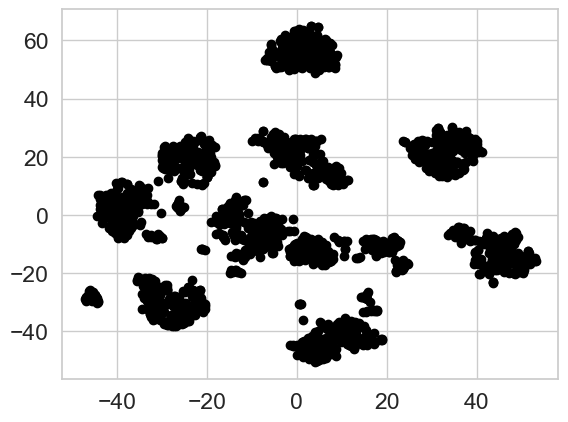

In [70]:
dots = plt.scatter(datos_reducidos[:,0],datos_reducidos[:,1],c="black")

Y el sacatter

Ahora haz el scatter con colores diferentes

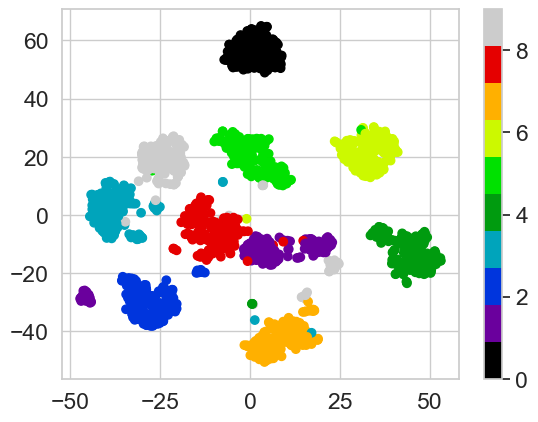

In [71]:
dots = plt.scatter(datos_reducidos[:,0],datos_reducidos[:,1],c=digits.target,cmap=plt.get_cmap("nipy_spectral",10))
color_bar = plt.colorbar(dots)

## 15.7 Aprendizaje no supervisado parte 2

### 15.7.1  Cargar el Dataset de Iris

Carga load_iris de sklearn.datasets

In [72]:
from sklearn.datasets import load_iris

Arma un objeto iris de load_iris

In [73]:
iris = load_iris()

Veamos la descripción del dataset

In [74]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Veamos la figura del iris.data

In [75]:
iris.data.shape

(150, 4)

La figura del iris.shape

In [76]:
iris.target.shape

(150,)

Conozcamos los posibles targets con target_names

In [77]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Y también los feature names

In [78]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 15.7.2  Explorar el dataset de Iris

Importamos pandas

In [79]:
import pandas as pd

Le decimos que maximo 5 columans

OptionError: Pattern matched multiple keys

Y sin display width

In [81]:
pd.set_option("display.width", None)

Cargamos un dataframe con iris.data

In [82]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

Y le pegamos las especies que vienen de iris.target_names

In [83]:
iris_df["Especie"] = [iris.target_names[i] for i in iris.target]

Checa el head del dataset

In [85]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especie
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Pon la precision de pandas a 2 decimales

OptionError: Pattern matched multiple keys

Armate un describe del dataframe

In [87]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Y un describe de la columna de species solamente

In [88]:
iris_df["Especie"].describe()

count        150
unique         3
top       setosa
freq          50
Name: Especie, dtype: object

### 15.7.3  Visualizar el Dataset con Pairplot

Importa seaborn si no lo has hecho

In [89]:
import seaborn as sns

Cambia la fuente a 1.1

In [91]:
sns.set(font_scale=1.1)

Ponlo estilo whitegrid

In [92]:
sns.set_style("whitegrid")

Arma tu pairplot en un objeto llamado cuadricula

C:\Users\crist\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\crist\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\crist\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\crist\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

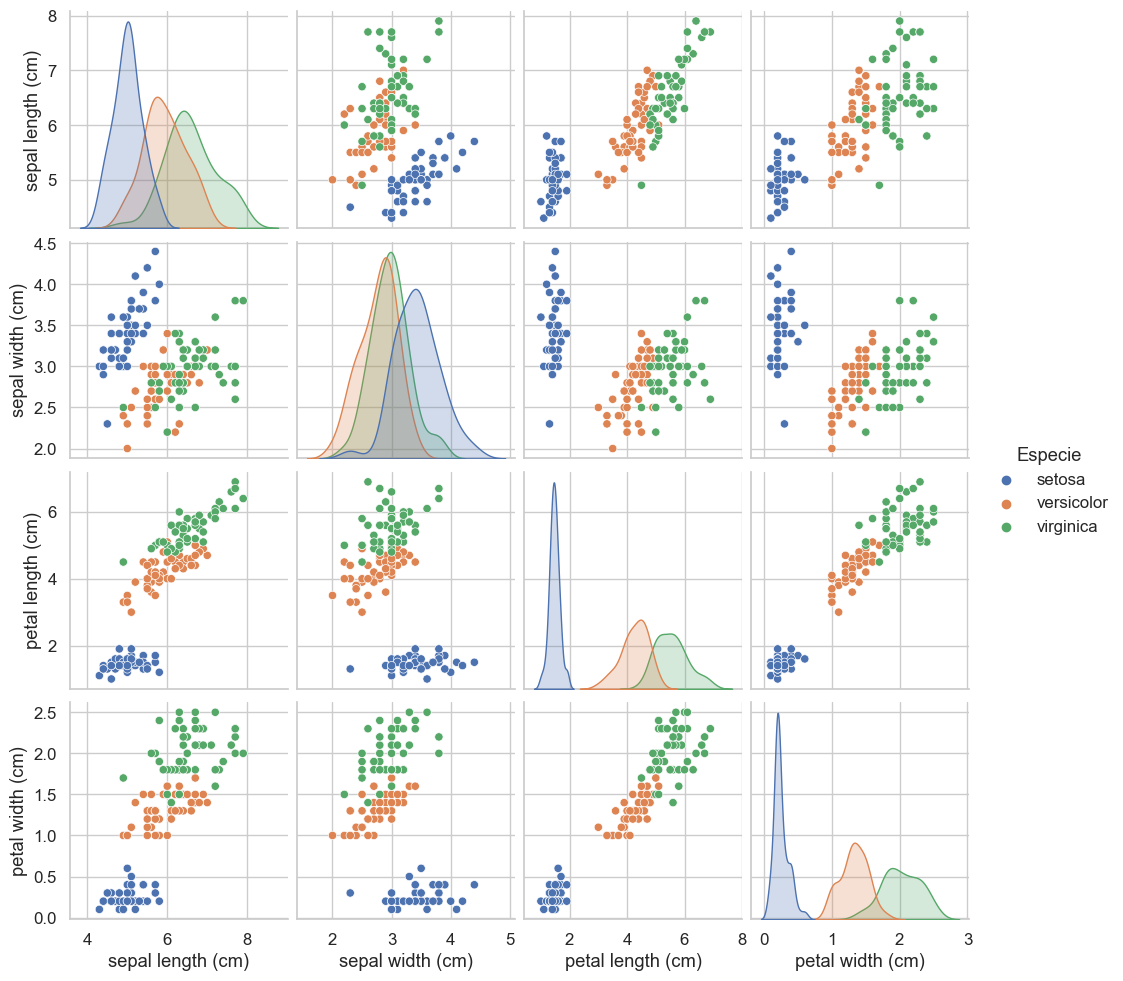

In [93]:
cuadricula = sns.pairplot(data = iris_df, vars= iris_df.columns[0:4],hue="Especie")

Ahora mostremos el pairplot en un solo color

C:\Users\crist\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\crist\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\crist\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\crist\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

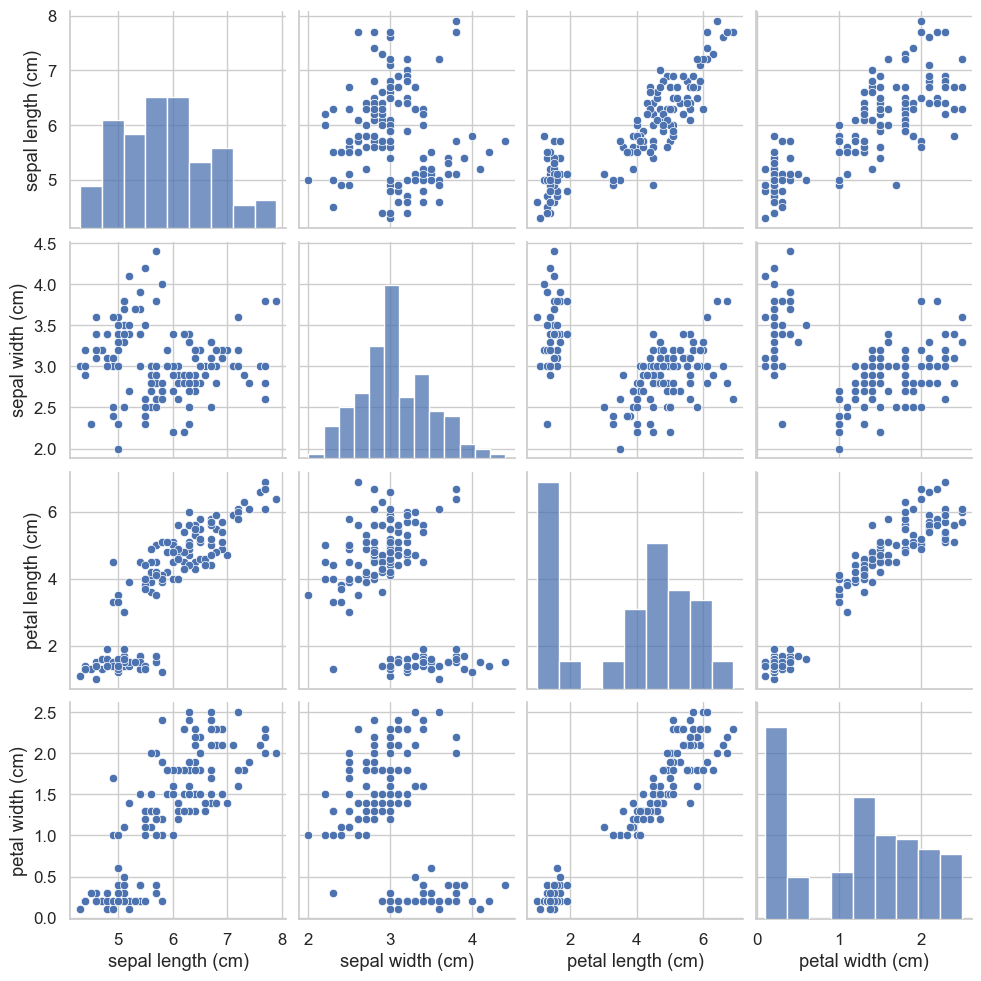

In [94]:
cuadricula = sns.pairplot(data = iris_df, vars= iris_df.columns[0:4])#sin hue

### 15.7.4  Usar un estimador KMeans

Vamos a importar Kmeans desde sklearn.cluster

In [95]:
from sklearn.cluster import KMeans

Ahora creamos el estimador

In [96]:
kmeans = KMeans(n_clusters=3, random_state=11)

Entrenamos el modelo con el metodo .fit

In [97]:
kmeans.fit(iris.data)

C:\Users\crist\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=11)

Imprimimos los primeros 50 resultados

In [98]:
print(kmeans.labels_[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Ahora los segundos 50

In [99]:
print(kmeans.labels_[50:100])

[2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Y los ultimos 50

In [100]:
print(kmeans.labels_[100:150])

[2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]


### 15.7.4  Reducción de dimensionalidad con PCA

Importa PCA de sklearn.decomposition

In [101]:
from sklearn.decomposition import PCA

Arma tu estimador PCA

In [107]:
pca = PCA(n_components=2, random_state=11)

Arma el fit

In [108]:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

Y luego transforma los datos usando transform

In [109]:
iris_pca = pca.transform(iris.data)

checa la figura de los datos que devolvió

In [110]:
iris_pca.shape

(150, 2)

Veamos losd datos reducidos, pasa esos nuevos datos a un dataframe

In [111]:
iris_pca_df = pd.DataFrame(iris_pca, columns = ["Componente 1", "Componente 2"])

pegale la especie a ese dataframe

In [112]:
iris_pca_df["Especie"] = iris_df.Especie

arma un scatterplot en seaborn

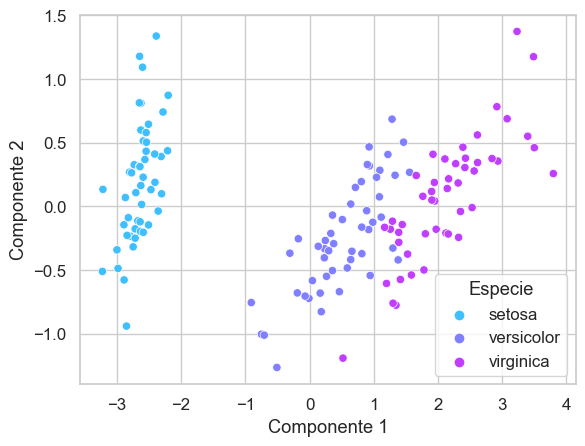

In [116]:
axes = sns.scatterplot(data = iris_pca_df, x = "Componente 1", y = "Componente 2",hue="Especie",legend="brief",palette="cool")#legenf brief para obtener los nombres de los datos y ponerlos en la tabla

Vamos armando un objeto centroide para mostrar en seaborn

In [117]:
iris_center = pca.transform(kmeans.cluster_centers_)

importa matplotlib

In [118]:
import matplotlib.pyplot as plt

Muestra los scatter

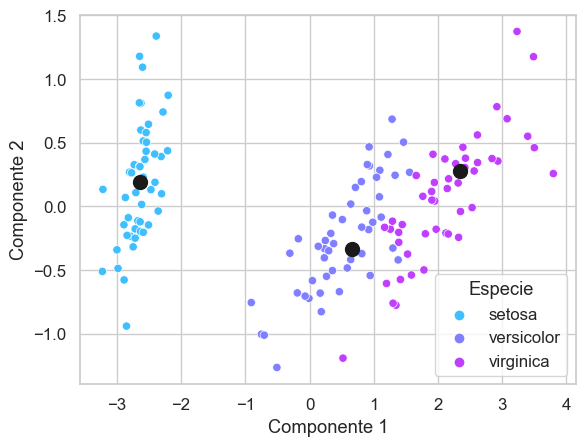

In [120]:
axes = sns.scatterplot(data = iris_pca_df, x = "Componente 1", y = "Componente 2",hue="Especie",legend="brief",palette="cool")#legenf brief para obtener los nombres de los datos y ponerlos en la tabla
dots = plt.scatter(iris_center[:,0],iris_center[:,1],s=100,c="k")

### 15.7.4  Escoger el mejor estimador de CLustering

importa DBSCAN, Meanshift, spectral clustering, agglomerative clustering

In [121]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering

Arma un diccionario con los estimadores

In [122]:
estimadores = {"KMeans":kmeans,"DBSCAN":DBSCAN(),"MeanShift":MeanShift(),"SpectralClustering":SpectralClustering(),"AgglomerativeClustering":AgglomerativeClustering()}

importa Numpy as np

In [123]:
import  numpy as np

arma el for que va a hacer los estimadores

In [124]:
for nombre, estimador in estimadores.items():
    estimador.fit(iris.data)
    print(f'\n{nombre:}:')
    for i in range(0,101,50):
        label, cuentas = np.unique(estimador.labels_[i:i+50],return_counts=True)
        print(f'{i}-{i+50}:')
        for label , cuentas in zip(label,cuentas):
            print(f' label={label}, cuentas={cuentas}')

C:\Users\crist\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



KMeans:
0-50:
 label=0, cuentas=50
50-100:
 label=1, cuentas=47
 label=2, cuentas=3
100-150:
 label=1, cuentas=14
 label=2, cuentas=36

DBSCAN:
0-50:
 label=-1, cuentas=1
 label=0, cuentas=49
50-100:
 label=-1, cuentas=6
 label=1, cuentas=44
100-150:
 label=-1, cuentas=10
 label=1, cuentas=40

MeanShift:
0-50:
 label=1, cuentas=50
50-100:
 label=0, cuentas=49
 label=1, cuentas=1
100-150:
 label=0, cuentas=50


C:\Users\crist\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



SpectralClustering:
0-50:
 label=0, cuentas=22
 label=2, cuentas=28
50-100:
 label=3, cuentas=4
 label=4, cuentas=20
 label=5, cuentas=23
 label=6, cuentas=3
100-150:
 label=1, cuentas=6
 label=5, cuentas=1
 label=6, cuentas=16
 label=7, cuentas=27

AgglomerativeClustering:
0-50:
 label=1, cuentas=50
50-100:
 label=0, cuentas=50
100-150:
 label=0, cuentas=50
